# Data Description


The actual concrete compressive strength (MPa) for a given mixture under a  specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations). 

Objective: Modeling of strength of high performance concrete using Machine Learning 

# 1. Deliverable -1 (Exploratory data quality report reflecting the following) 

### a. Univariate analysis  i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [2]:
cData = pd.read_csv("concrete.csv")  
cData.shape

(1030, 9)

In [4]:
cData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
datatype=cData.dtypes  
print(datatype)

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


In [6]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


None of the variables are of object type

#### 5 Point summary of numerical attributes

In [7]:
cData.drop(['strength'],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.0,192.375,272.9,350.00,540.0
slag,1030.0,73.895825,86.279342,0.0,0.000,22.0,142.95,359.4
ash,1030.0,54.188350,63.997004,0.0,0.000,0.0,118.30,200.1
water,1030.0,181.567282,21.354219,121.8,164.900,185.0,192.00,247.0
superplastic,1030.0,6.204660,5.973841,0.0,0.000,6.4,10.20,32.2
coarseagg,1030.0,972.918932,77.753954,801.0,932.000,968.0,1029.40,1145.0
fineagg,1030.0,773.580485,80.175980,594.0,730.950,779.5,824.00,992.6
age,1030.0,45.662136,63.169912,1.0,7.000,28.0,56.00,365.0


There is significant skewness present for  few independent variables 
slag,ash,water,superplastic,coarseagg,age

Outlier are present for slag,water,superplastic,fineagg and age


From the data is clear there are some missing values for slag, asj and superplastic.
As those are mandatory ingradients values their value can not be zero. So 0 for them can be considered as missing values.


### b. Multivariate analysis  i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes 

In [8]:
# strength is the Target column
# Rest all variable are the predictor variables

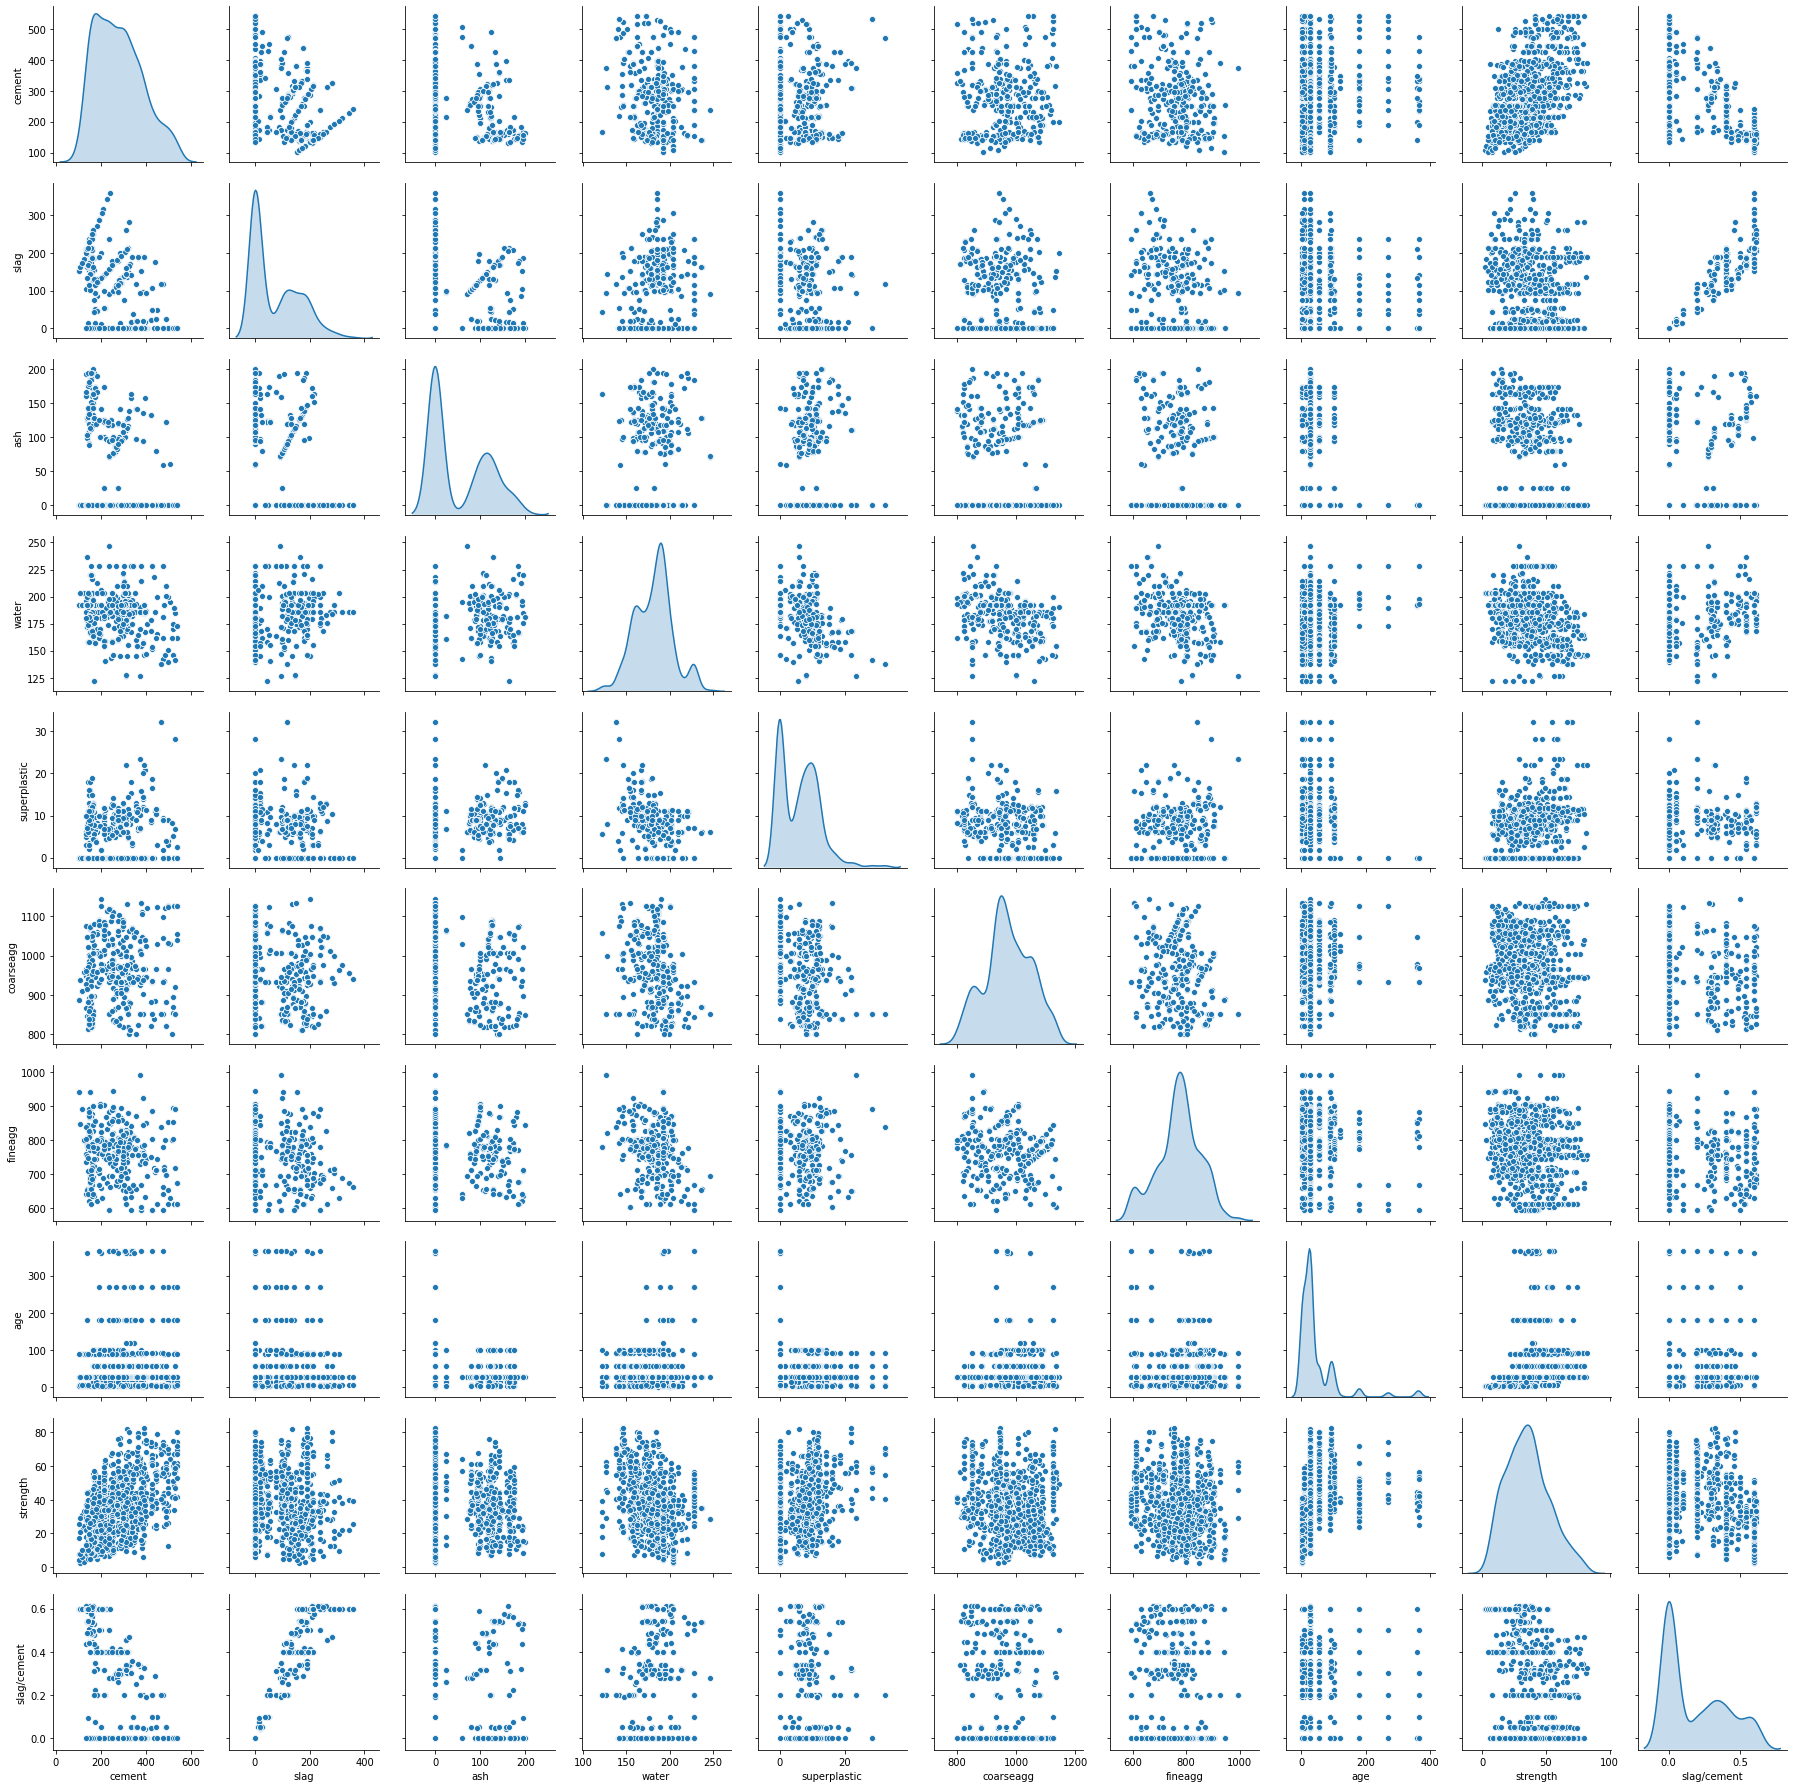

In [9]:
df_attr = cData.iloc[:, 0:9]
# aschemical reaction of slag cement  and portland cement has impact on strength try to extract any hideen patter from newly created variable
df_attr['slag/cement']=cData['slag']/(cData['slag']+cData['cement'])
##sns.set(style="ticks", color_codes=True)
sns.pairplot(df_attr, diag_kind='kde')

In [10]:
#The data distribution across various dimensions except strength do not look normal
#Close observation between 'strength' and other attributes indicate the relationship is not really linear
#relation between 'strength' and 'cement' show hetroscedacity... which will impact model accuracy
#However  'strength' vs 'cement' is having some how slight a positive relation

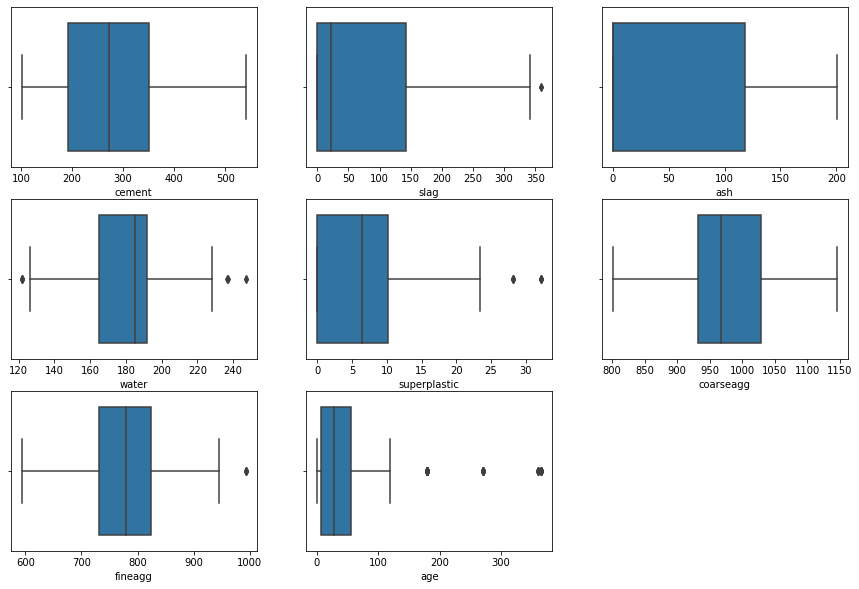

In [11]:
plt.figure (figsize=(15,10))
pos =1
for i in cData.drop(columns='strength').columns:
    plt.subplot(3,3,pos)
    sns.boxplot(x=cData[i])
    pos =pos +1
#plt.show()

There are quiet a lot of outliers

 Lets treat them.  


### c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

#### Addressing Missing value

In [12]:
#Handling the missing values 
#replacing missing values 0 to NaN
cData[['slag','ash','superplastic']]=cData[['slag','ash','superplastic']].replace(0,np.NaN)

In [13]:
#Imputation for missing values using median as strategy   
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer = imputer.fit(cData)
transformed_cData= imputer.transform(cData)

In [14]:
transformed_cData

array([[141.3 , 212.  , 121.4 , ..., 748.5 ,  28.  ,  29.89],
       [168.9 ,  42.2 , 124.3 , ..., 796.2 ,  14.  ,  23.51],
       [250.  , 135.7 ,  95.7 , ..., 861.2 ,  28.  ,  29.22],
       ...,
       [276.4 , 116.  ,  90.3 , ..., 768.3 ,  28.  ,  44.28],
       [342.  ,  38.  , 121.4 , ..., 670.  , 270.  ,  55.06],
       [540.  , 135.7 , 121.4 , ..., 613.  ,   7.  ,  52.61]])

In [15]:
# modified Dataframe with no missing values
cData_n=pd.DataFrame(transformed_cData,columns=cData.columns)
cData_n_copy= cData_n.copy(deep = True) ## This data frame will not be modfied  now.Created a mirror copy to avoid rebuilding the data without missing values

In [16]:
cData_n.head(30)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28.0,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28.0,18.29
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90.0,21.86
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7.0,15.75
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56.0,36.64
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28.0,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28.0,28.99


#### Addressing Outliers

We have used the strategy to replace outliers  with the median values.


We first identfy the out liers using  formula

q1-1.5*IQR 

q3+1.5*IQR

In [17]:
for i in cData_n.columns:
    q1, q2, q3 = cData_n[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = cData_n[i] > q3 + 1.5*IQR  
    b = cData_n[i] < q1 - 1.5*IQR
    cData_n[i] = np.where(a | b, np.median(cData_n[i].values), cData_n[i])  

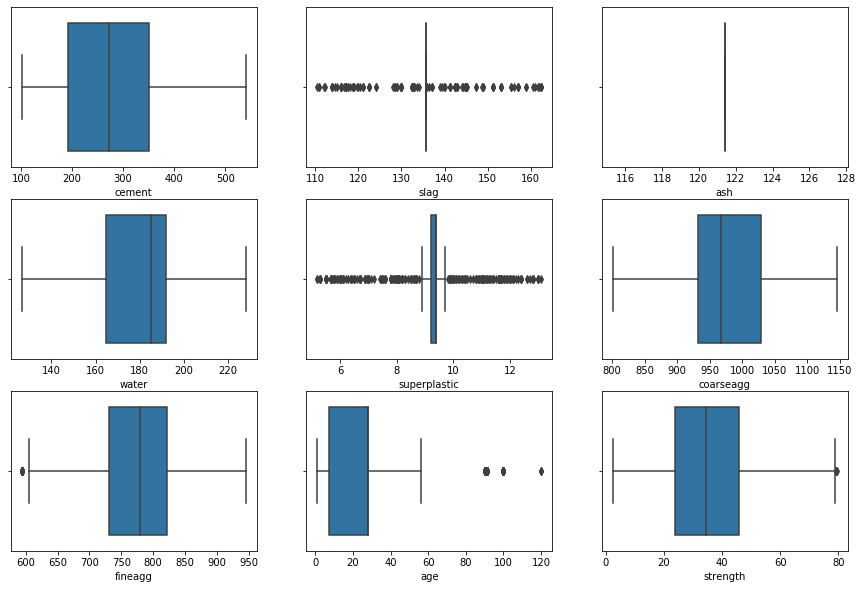

In [18]:
plt.figure(figsize=(15,10))
pos = 1
for i in cData_n.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(cData_n[i])
    pos += 1 

Comparing with previous box plot it is visible that outliers have been reduced.

# 2. Deliverable -2 (Feature Engineering techniques)
 
 a. Identify opportunities (if any) to create a composite feature, drop a feature
 
 b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help  
 
 c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength 

### a.Identify opportunities (if any) to create a composite feature, drop a feature

•	From the pair plot we can find a negative co relation is present between 'water and superplastic'

•	We create a composite feature 'slag/cement'

•	From distribution 'ash' looks to have almost very little impact  on strength 

•	So we can drop the feature 'ash'

In [19]:
Str_df_attr =cData_n.loc[:, 'cement':'strength']
# New feature created  as slag and portalnd cement reaction plays role in strength of concerete
Str_df_attr['slag/cement']=Str_df_attr['slag']/(Str_df_attr['slag']+Str_df_attr['cement'])
Str_df_attr.pop('ash')
Str_df_attr

C:\Personal\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cement,slag,water,superplastic,coarseagg,fineagg,age,strength,slag/cement
0,141.3,135.7,203.5,9.4,971.8,748.5,28.0,29.890,0.489892
1,168.9,135.7,158.3,10.8,1080.8,796.2,14.0,23.510,0.445502
2,250.0,135.7,187.4,5.5,956.9,861.2,28.0,29.220,0.351828
3,266.0,114.0,228.0,9.4,932.0,670.0,28.0,45.850,0.300000
4,154.8,135.7,193.3,9.1,1047.4,696.7,28.0,18.290,0.467126
5,255.0,135.7,192.0,9.4,889.8,945.0,90.0,21.860,0.347325
6,166.8,135.7,203.5,9.4,975.6,692.6,7.0,15.750,0.448595
7,251.4,135.7,188.5,6.4,1028.4,757.7,56.0,36.640,0.350555
8,296.0,135.7,192.0,9.4,1085.0,765.0,28.0,21.650,0.314339
9,155.0,135.7,194.0,9.0,880.0,699.0,28.0,28.990,0.466804


In [20]:
cData_n.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,135.7,121.4,203.5,9.4,971.8,748.5,28.0,29.89
1,168.9,135.7,121.4,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,135.7,121.4,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28.0,45.85
4,154.8,135.7,121.4,193.3,9.1,1047.4,696.7,28.0,18.29


In [21]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = Str_df_attr.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = Str_df_attr[['strength']]

### b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help 

•	From the pair plot it is clear there that is no straight forward linear relation between the variables. Few are also having curvilinear releation

•	So, we generate a quadratic polynomial models reflecting the non-linear interaction between different dimensions.


In [22]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [23]:
X_poly = poly.fit_transform(X)
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721, 1), (309, 1))

### c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength 

•	From the pair plot it is see there are 2 -3 picks and valleys   in density distribution plot for some variable

•	So, there can be apparent mix of 2 to 3 gaussians.

•	Let us explore the data for hidden clusters


In [24]:
#Lets try KMeans Clustering

In [25]:
K_df_attr =cData_n_copy.loc[:, 'cement':'strength']# using the data frame with outlier as  for cData_n we already removed outlier
X = K_df_attr.drop('strength', axis=1)
y = K_df_attr[['strength']]

In [26]:
cluster_range = range( 1, 6 )   # expect 2 to 3 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.210942e+07
1,2,2.347607e+07
2,3,2.025728e+07
3,4,1.785087e+07
4,5,1.559222e+07


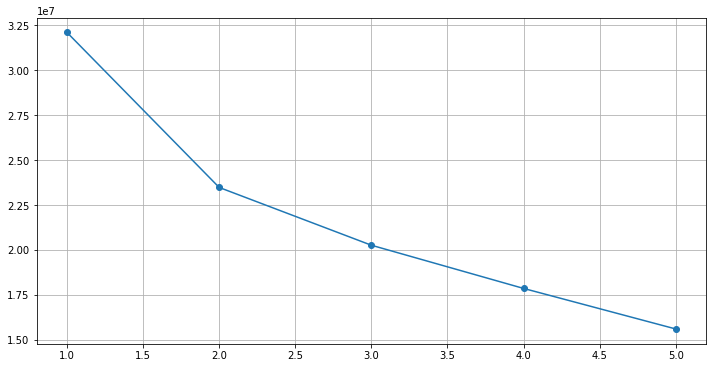

In [27]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.grid(True)

In [28]:
# The elbow plot confirms our visual analysis that there are likely 2 or 3 good clusters
# Let us start with 2 clusters

In [29]:
df_attr = cData_n_copy.loc[:, 'cement':'strength']
df_attr_z = df_attr.apply(zscore)
cluster = KMeans( n_clusters = 2, random_state = 2354 )
cluster.fit(df_attr_z)
prediction=cluster.predict(df_attr_z)
df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

df_attr_z_copy = df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [30]:
centroids = cluster.cluster_centers_
centroids

array([[-0.5707864 ,  0.19740372,  0.19262985,  0.10881997, -0.25533697,
         0.22365422,  0.15683704, -0.23087993, -0.56078899],
       [ 0.84586418, -0.29253805, -0.28546351, -0.16126333,  0.37839093,
        -0.33143938, -0.23242115,  0.34214737,  0.83104875]])

In [31]:
cData_n_copy.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28.0,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28.0,18.29


In [32]:
centroid_df = pd.DataFrame(centroids, columns = list(cData_n_copy) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.570786,0.197404,0.192630,0.108820,-0.255337,0.223654,0.156837,-0.230880,-0.560789
1,0.845864,-0.292538,-0.285464,-0.161263,0.378391,-0.331439,-0.232421,0.342147,0.831049


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001658026CE48>,
      dtype=object)

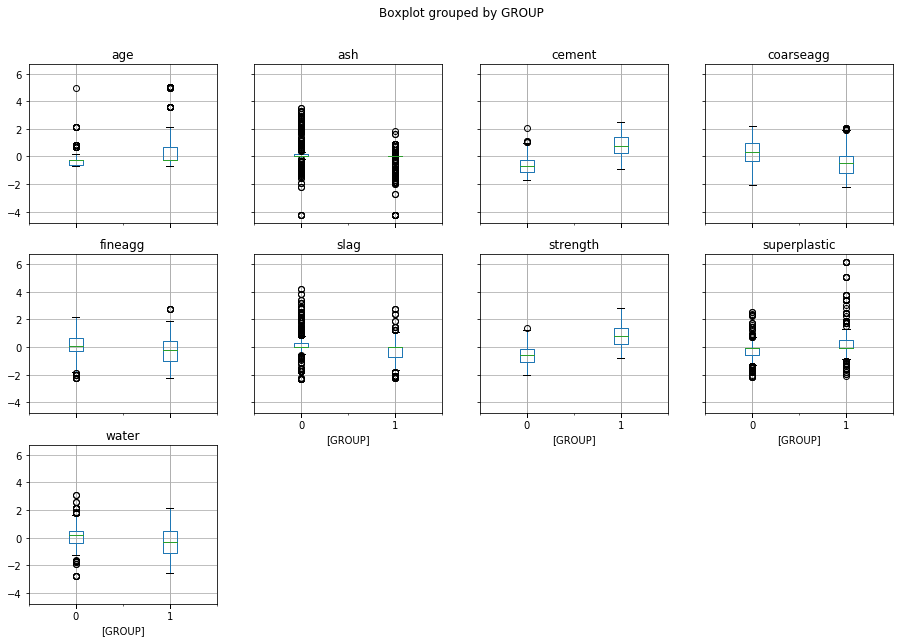

In [33]:
df_attr_z.boxplot(by = 'GROUP',  layout=(3,4), figsize=(15, 10))

In [34]:
# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now 


Identifying and handling outliers

In [35]:
# Addressing outliers at group level

data = df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(df_attr_z['GROUP']))

C:\Personal\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016585BFD550>,
      dtype=object)

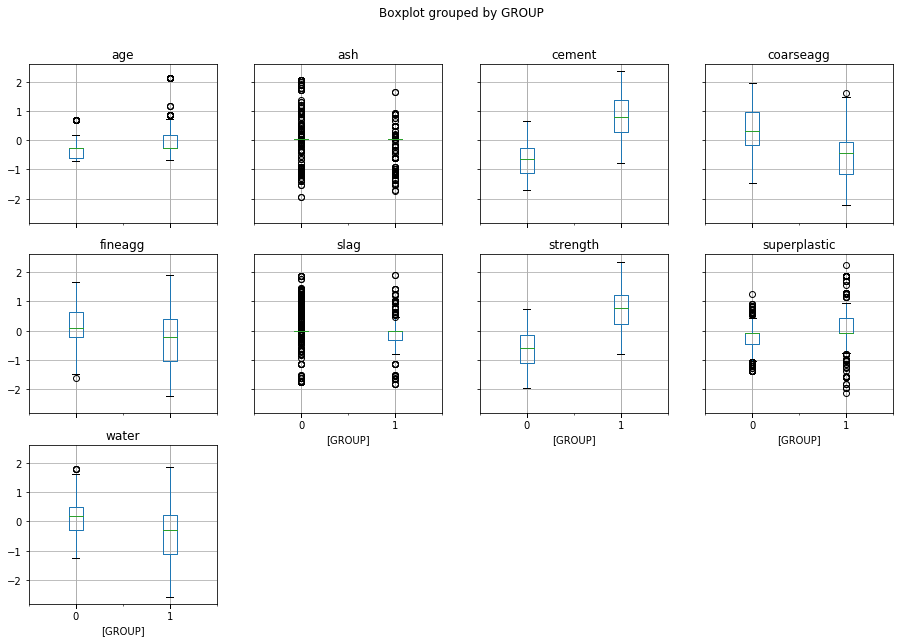

In [36]:
concat_data.boxplot(by = 'GROUP', layout=(3,4), figsize=(15, 10))

When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


#### Let us analyze the strength column vs other columns group wise.


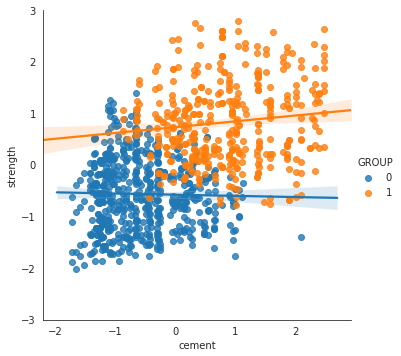

In [37]:
# stength Vs cement

var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

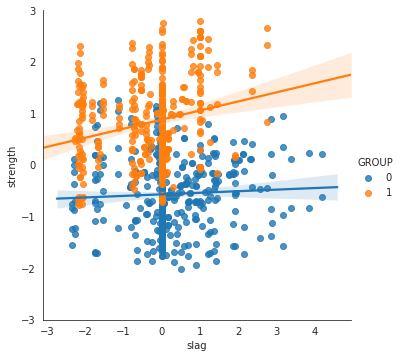

In [38]:
# stength Vs slag

var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

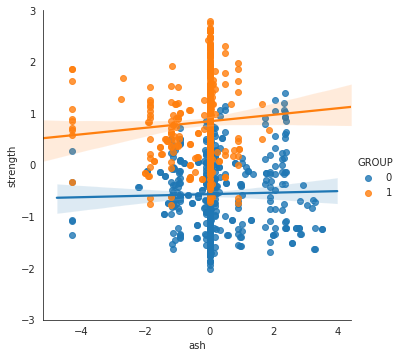

In [39]:
# stength Vs ash

var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

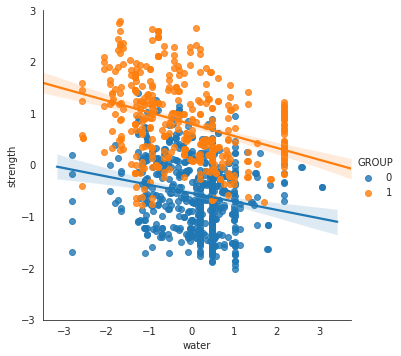

In [40]:
# stength Vs water

var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

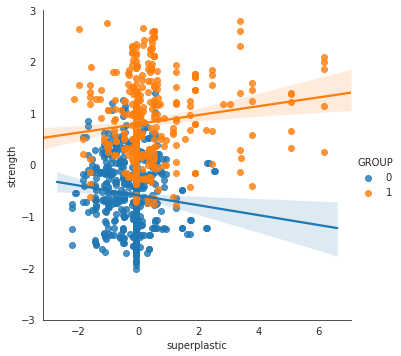

In [41]:
# stength Vs superplastic

var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

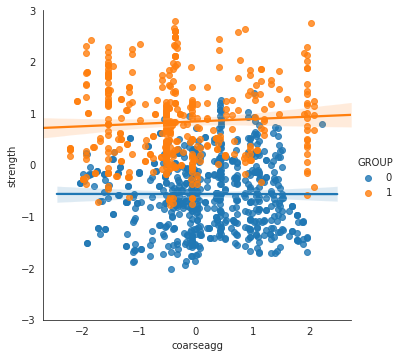

In [42]:
# stength Vs coarseagg

var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

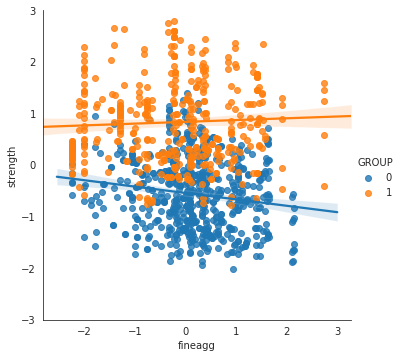

In [43]:
# stength Vs fineagg

var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

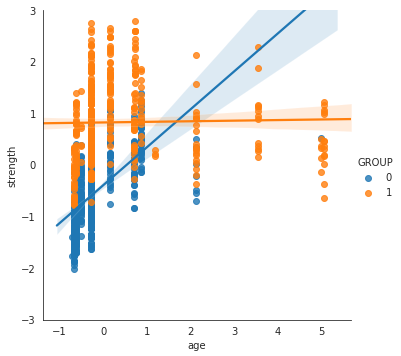

In [44]:
# stength Vs age

var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=df_attr_z,hue='GROUP')
plot.set(ylim = (-3,3))

In [45]:
#GROUP based clustering is not clearly distinguishing the clusters on any dimension and spread also is not that large
#So mixing of gaussion may not be playing that important role here
#Among all of the independent attributes ash and coarseaff are not suitable to predict strength 

# 3. Deliverable -3  (create the model )

 a. Obtain feature importance for the individual features and present your findings 

### DecisionTree Regression

In [46]:
Str_df_attr =cData_n.loc[:, 'cement':'strength']
Str_df_attr['slag/cement']=Str_df_attr['slag']/(Str_df_attr['slag']+Str_df_attr['cement'])
#Str_df_attr.pop('coarseagg')
Str_df_attr

C:\Personal\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,slag/cement
0,141.3,135.7,121.4,203.5,9.4,971.8,748.5,28.0,29.890,0.489892
1,168.9,135.7,121.4,158.3,10.8,1080.8,796.2,14.0,23.510,0.445502
2,250.0,135.7,121.4,187.4,5.5,956.9,861.2,28.0,29.220,0.351828
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28.0,45.850,0.300000
4,154.8,135.7,121.4,193.3,9.1,1047.4,696.7,28.0,18.290,0.467126
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90.0,21.860,0.347325
6,166.8,135.7,121.4,203.5,9.4,975.6,692.6,7.0,15.750,0.448595
7,251.4,135.7,121.4,188.5,6.4,1028.4,757.7,56.0,36.640,0.350555
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28.0,21.650,0.314339
9,155.0,135.7,121.4,194.0,9.0,880.0,699.0,28.0,28.990,0.466804


In [47]:
Str_df_attr_z = Str_df_attr.apply(zscore)
print(Str_df_attr_z.info())
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = Str_df_attr_z.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = Str_df_attr_z[['strength']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
slag/cement     1030 non-null float64
dtypes: float64(10)
memory usage: 80.5 KB
None


In [48]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = X.columns
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'slag/cement'],
      dtype='object')
[0.46791746 0.         0.         0.08485532 0.         0.
 0.         0.44722722 0.        ]
Index(['cement', 'age', 'water', 'slag/cement', 'fineagg', 'coarseagg',
       'superplastic', 'ash'],
      dtype='object') [0.46791746 0.         0.         0.08485532 0.         0.
 0.         0.44722722 0.        ]


Text(0.5, 0, 'Relative Importance')

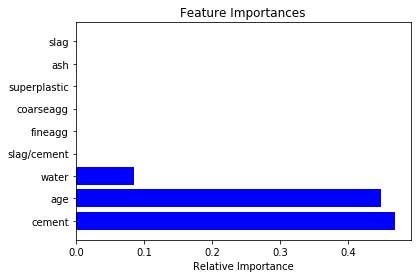

In [49]:
# View a list of the features and their importance scores
regressor = DecisionTreeRegressor(random_state=0, max_depth=3)
regressor.fit(X_train , y_train)
importances = regressor.feature_importances_
indices = np.argsort(importances)[::-1][:9]
a = X.columns[:]
features= a
#features= a.drop('default',1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# 4. Deliverable -4 (Tuning the model)

a. Algorithms that you think will be suitable for this project

b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

c. Model performance range at 95% confidence level 

### a. Algorithms that you think will be suitable for this project

#### Fit a simple linear model


In [50]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.21748347014276173
The coefficient for slag is -0.022807183514665135
The coefficient for ash is 5.551115123125783e-17
The coefficient for water is -0.43729830288701227
The coefficient for superplastic is 0.019592888445476117
The coefficient for coarseagg is -0.26994104933797963
The coefficient for fineagg is -0.31147567198269704
The coefficient for age is 0.5296633885262594
The coefficient for slag/cement is -0.16339103672848318


In [51]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.00412848497664194


#### Create a regularized RIDGE model and note the coefficients


In [52]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.2173832  -0.02279845  0.         -0.4369131   0.01963349 -0.26970416
  -0.31112261  0.52942222 -0.16353174]]


#### Create a regularized LASSO model and note the coefficients


In [53]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.30083823 -0.          0.         -0.20848894  0.         -0.09563912
 -0.07303541  0.41630065 -0.07323438]


#### Let us compare their scores

In [54]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.692783621885541
0.6404487345422649


In [55]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6927834230349945
0.6404519907374511


In [56]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6127521598400933
0.5480759184525532


In [57]:
# More or less similar results but with less complex models.
#All the models are overfitted
#The co effiecent for slag,ash,superplastic are very small and for Ridge 'ash' is zero lasso few more dimension becomes zero. So we can drop ash',, from the feature

### b.Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit 

#### Fit a simple non regularized linear model on poly features-

In [58]:
Str_df_attr =cData_n.loc[:, 'cement':'strength']
Str_df_attr['slag/cement']=Str_df_attr['slag']/(Str_df_attr['slag']+Str_df_attr['cement'])
#Str_df_attr.pop('slag')
Str_df_attr.pop('ash')
#Str_df_attr.pop('superplastic')
Str_df_attr

C:\Personal\Software\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cement,slag,water,superplastic,coarseagg,fineagg,age,strength,slag/cement
0,141.3,135.7,203.5,9.4,971.8,748.5,28.0,29.890,0.489892
1,168.9,135.7,158.3,10.8,1080.8,796.2,14.0,23.510,0.445502
2,250.0,135.7,187.4,5.5,956.9,861.2,28.0,29.220,0.351828
3,266.0,114.0,228.0,9.4,932.0,670.0,28.0,45.850,0.300000
4,154.8,135.7,193.3,9.1,1047.4,696.7,28.0,18.290,0.467126
5,255.0,135.7,192.0,9.4,889.8,945.0,90.0,21.860,0.347325
6,166.8,135.7,203.5,9.4,975.6,692.6,7.0,15.750,0.448595
7,251.4,135.7,188.5,6.4,1028.4,757.7,56.0,36.640,0.350555
8,296.0,135.7,192.0,9.4,1085.0,765.0,28.0,21.650,0.314339
9,155.0,135.7,194.0,9.0,880.0,699.0,28.0,28.990,0.466804


In [59]:
Str_df_attr_z = Str_df_attr.apply(zscore)
print(Str_df_attr_z.info())
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = Str_df_attr_z.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = Str_df_attr_z[['strength']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
slag/cement     1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB
None


In [60]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [61]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 1.50970265e-17  2.14672851e-01 -3.68570729e-02 -4.54788401e-01
 -4.32670763e-02 -2.79108718e-01 -2.81743684e-01  5.40670042e-01
 -2.12330153e-01 -3.98830633e-02  1.14322552e-01 -2.25097520e-01
  4.00361807e-01  2.81629120e-01 -4.56347282e-02 -3.00419723e-02
 -1.95956221e-02  3.40294067e-02 -6.45722893e-02  2.03133466e-03
 -1.11253672e-03 -1.74834600e-02 -1.20959208e-01 -8.49653942e-02
 -3.19872815e-02 -9.29282890e-02  1.17157887e-01 -6.67891760e-02
 -9.38115568e-02  2.14384236e-02 -2.01808896e-01  2.12498653e-02
 -4.77152548e-02  3.79186345e-01 -9.25710422e-02  2.66816359e-01
 -5.01807850e-03]


In [62]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7216458455918051
0.6814716433305291


In [63]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.21356958 -0.03624509 -0.45455533 -0.04190792 -0.27920197
  -0.28235548  0.54035775 -0.21156602 -0.03717627  0.10562629 -0.21644261
   0.38548795  0.26780794 -0.04499086 -0.02849068 -0.01804887  0.03300582
  -0.06293646  0.00448079 -0.00129204 -0.01588227 -0.11965427 -0.08477979
  -0.03239152 -0.09282762  0.10895009 -0.0655185  -0.09294647  0.02160655
  -0.19423872  0.01972251 -0.04744136  0.36463614 -0.09246875  0.25395937
  -0.004365  ]]


In [64]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.721635454459407
0.6812104665825347


In [65]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.20997956 -0.01214417 -0.42952518  0.         -0.25668929
 -0.2794587   0.5188984  -0.18359989  0.         -0.00218648  0.
  0.0154886  -0.         -0.00696312 -0.         -0.          0.
 -0.          0.05060022 -0.         -0.         -0.05101758 -0.05097495
 -0.02847933 -0.06085261  0.         -0.00907955 -0.03615245  0.01459166
 -0.00327439 -0.         -0.00464489  0.         -0.04778901  0.00057276
  0.        ]


In [66]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7105335971995232
0.6612485260092396


In [67]:
#Result shas been improve with complex model
#So model would be quadratic i.e of degree 2 . 

### c. Model performance range at 95% confidence level  

To evaluate performance we will use Kfold validation on each model and claculate the range


To find the perfomance range  at 95% we will consider   the  range between

(Mean - 2 standard deviation)  and (Mean + 2 standard deviation)

In [74]:
num_folds = 10  # As per imperically used in many model
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.66811737 0.67872261 0.70694243 0.59675795 0.70272405 0.72391421
 0.6668959  0.66558343 0.70470276 0.50967662]
Accuracy: 66.240% (6.095%)


 Mean accuracy = 66.240%
    
 2Standard deviation = 12.19%

 Range  from 54.05% to 78.43%


In [75]:
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = Ridge(alpha=.3)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.66817418 0.67872821 0.70692785 0.59677666 0.70272824 0.72388473
 0.66682924 0.66562013 0.70467814 0.50975106]
Accuracy: 66.241% (6.092%)


Mean accuracy = 66.241%

2Standard deviation = 12.184%

Range from 54.057% to 78.425%

In [76]:
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = Lasso(alpha=0.1)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.62560321 0.58559989 0.61792097 0.52858306 0.61450355 0.61831944
 0.52387323 0.62367531 0.59468761 0.51032422]
Accuracy: 58.431% (4.335%)


Mean accuracy = 58.431%

2Standard deviation = 8.67%

Range from 49.761% to 67.101%